In [ ]:
%run task3a.ipynb
%run task2a.ipynb
import numpy as np
import utils
import matplotlib.pyplot as plt
#from task2a import pre_process_images
from trainer import BaseTrainer
#from task3a import cross_entropy_loss, SoftmaxModel, one_hot_encode
np.random.seed(0)

Train shape: X: (3657, 784), Y: (3657, 1)
Validation shape: X: (415, 784), Y: (415, 1)
Y looks like this:  [[0 0 0 1 0 0 0 0 0 0]]
Train shape: X: (18000, 784), Y: (18000, 1)
Validation shape: X: (2000, 784), Y: (2000, 1)
Train shape: X: (3657, 784), Y: (3657, 1)
Validation shape: X: (415, 784), Y: (415, 1)


In [ ]:
def calculate_accuracy(X: np.ndarray, targets: np.ndarray, model: SoftmaxModel) -> float:
    """
    Args:
        X: images of shape [batch size, 785]
        targets: labels/targets of each image of shape: [batch size, 10]
        model: model of class SoftmaxModel
    Returns:
        Accuracy (float)
    """
    # TODO: Implement this function (task 3c)
    y_hat = model.forward(X)
    accuracy_count = np.count_nonzero(np.argmax(y_hat, axis=1) == np.argmax(targets, axis=1))
    accuracy = accuracy_count/X.shape[0]
    return accuracy


In [ ]:
class SoftmaxTrainer(BaseTrainer):

    def train_step(self, X_batch: np.ndarray, Y_batch: np.ndarray):
        """
        Perform forward, backward and gradient descent step here.
        The function is called once for every batch (see trainer.py) to perform the train step.
        The function returns the mean loss value which is then automatically logged in our variable self.train_history.

        Args:
            X: one batch of images
            Y: one batch of labels
        Returns:
            loss value (float) on batch
        """
        # TODO: Implement this function (task 3b)
        y_hat = self.model.forward(X_batch)
        self.model.backward(X_batch, y_hat, Y_batch)
        self.model.w -= self.learning_rate*self.model.grad
        loss = cross_entropy_loss(Y_batch, y_hat)
        return loss

    def validation_step(self):
        """
        Perform a validation step to evaluate the model at the current step for the validation set.
        Also calculates the current accuracy of the model on the train set.
        Returns:
            loss (float): cross entropy loss over the whole dataset
            accuracy_ (float): accuracy over the whole dataset
        Returns:
            loss value (float) on batch
            accuracy_train (float): Accuracy on train dataset
            accuracy_val (float): Accuracy on the validation dataset
        """
        # NO NEED TO CHANGE THIS FUNCTION
        logits = self.model.forward(self.X_val)
        loss = cross_entropy_loss(Y_val, logits)

        accuracy_train = calculate_accuracy(
            X_train, Y_train, self.model)
        accuracy_val = calculate_accuracy(
            X_val, Y_val, self.model)
        return loss, accuracy_train, accuracy_val


Train shape: X: (18000, 784), Y: (18000, 1)
Validation shape: X: (2000, 784), Y: (2000, 1)
Final Train Cross Entropy Loss: 0.04733365273223905
Final Validation Cross Entropy Loss: 0.048158535692678986
Final Train accuracy: 0.921
Final Validation accuracy: 0.924


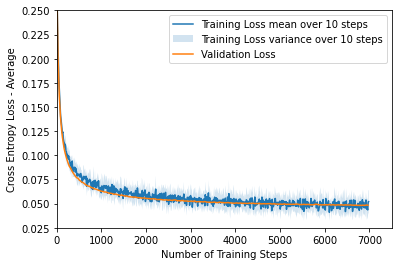

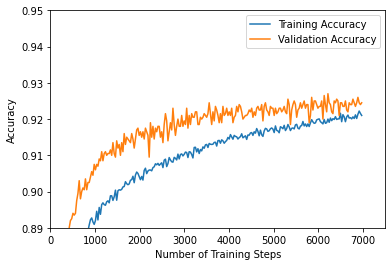

Early stop at  4 epochs


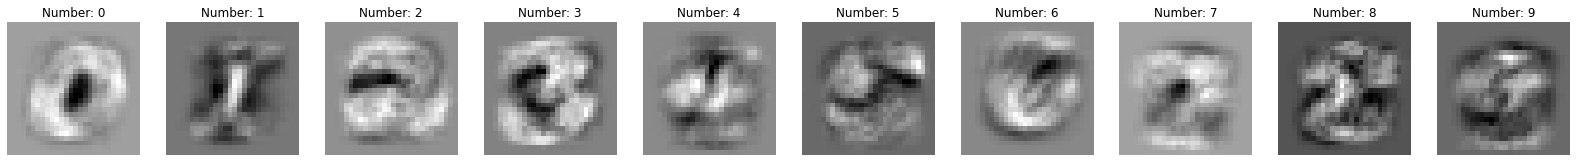

<Figure size 432x288 with 0 Axes>

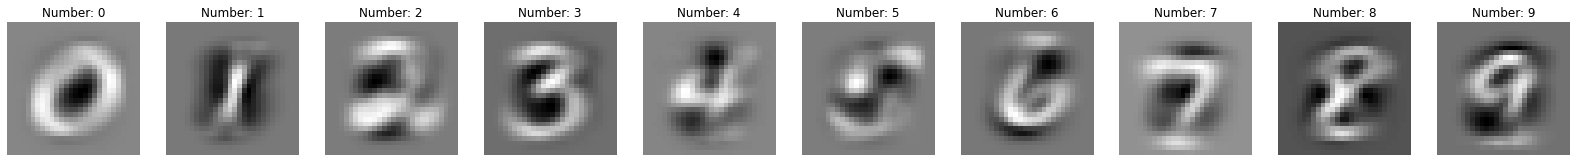

Early stop at  5 epochs
Early stop at  12 epochs
Early stop at  36 epochs
Early stop at  42 epochs


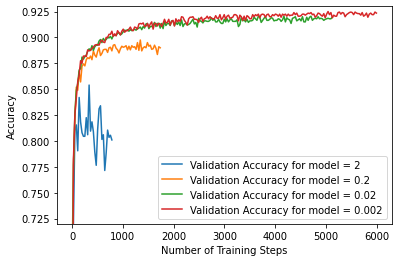

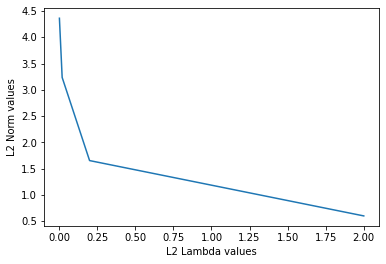

<Figure size 432x288 with 0 Axes>

In [ ]:
if __name__ == "__main__":
    # hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
    num_epochs = 50
    learning_rate = 0.01
    batch_size = 128
    l2_reg_lambda = 0
    shuffle_dataset = True

    # Load dataset
    X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
    X_train = pre_process_images(X_train)
    X_val = pre_process_images(X_val)
    Y_train = one_hot_encode(Y_train, 10)
    Y_val = one_hot_encode(Y_val, 10)

    # ANY PARTS OF THE CODE BELOW THIS CAN BE CHANGED.
    
    # Intialize model
    model = SoftmaxModel(l2_reg_lambda)
    # Train model
    trainer = SoftmaxTrainer(
        model, learning_rate, batch_size, shuffle_dataset,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)

    print("Final Train Cross Entropy Loss:",
          cross_entropy_loss(Y_train, model.forward(X_train)))
    print("Final Validation Cross Entropy Loss:",
          cross_entropy_loss(Y_val, model.forward(X_val)))
    print("Final Train accuracy:", calculate_accuracy(X_train, Y_train, model))
    print("Final Validation accuracy:", calculate_accuracy(X_val, Y_val, model))

    plt.ylim([0.025, .25])
    plt.xlim([0.0, 7500])
    utils.plot_loss(train_history["loss"],
                    "Training Loss", npoints_to_average=10)
    utils.plot_loss(val_history["loss"], "Validation Loss")
    plt.legend()
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Cross Entropy Loss - Average")
    plt.savefig("task3b_softmax_train_loss.png")
    plt.show()
    

    # Plot accuracy
    plt.ylim([0.89, .95])
    plt.xlim([0.0, 7500])
    utils.plot_loss(train_history["accuracy"], "Training Accuracy")
    utils.plot_loss(val_history["accuracy"], "Validation Accuracy")
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("task3b_softmax_train_accuracy.png")
    plt.show()

    # Train a model with L2 regularization (task 4b)
    
    model1 = SoftmaxModel(l2_reg_lambda=2.0)
    trainer = SoftmaxTrainer(
        model1, learning_rate, batch_size, shuffle_dataset,
        X_train, Y_train, X_val, Y_val,
    )
    
    train_history_reg01, val_history_reg01 = trainer.train(num_epochs)
    
    # You can finish the rest of task 4 below this point.

    # Plotting of softmax weights (Task 4b)
    fig = plt.figure(figsize=(28, 28))
    for i in range(model.w.shape[1]):
        weight = model.w[:,i][:-1].reshape((28,28))
        # Adds a subplot at the 1st position
        fig.add_subplot(1, 10, i + 1)  # rows, colums, position
        # showing image
        plt.imshow(weight, cmap="gray")
        plt.axis('off')
        plt.title(f"Number: {i}")
    plt.show()
    plt.savefig("task4b_softmax_weight_lambda0.png")

    fig_l2 = plt.figure(figsize=(28, 28))
    for i in range(model1.w.shape[1]):
        weight_l2 = model1.w[:,i][:-1].reshape((28,28))
        # Adds a subplot at the 1st position
        fig_l2.add_subplot(1, 10, i + 1)  # rows, colums, position
        # showing image
        plt.imshow(weight_l2, cmap='gray')
        plt.axis('off')
        plt.title(f"Number: {i}")
    plt.show()
    plt.savefig("task4b_softmax_weight_lambda2.png")
    
    # Plotting of accuracy for difference values of lambdas (task 4c)
    l2_lambdas = [2, .2, .02, .002]
    norms = np.zeros_like(l2_lambdas)

    for i in range(len(l2_lambdas)):
        model = SoftmaxModel(l2_lambdas[i])
        trainer = SoftmaxTrainer(
            model, learning_rate, batch_size, shuffle_dataset,
            X_train, Y_train, X_val, Y_val,
        )
    
        train_history, val_history = trainer.train(num_epochs)
        utils.plot_loss(val_history["accuracy"], f"Validation Accuracy for model = {l2_lambdas[i]}")
        norms[i] = np.linalg.norm(model.w)
    
    plt.ylim([0.72, .93])
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Accuracy")
    plt.legend()    
    plt.show()
    plt.savefig("task4c_l2_reg_accuracy.png")

    # Task 4d - Plotting of the l2 norm for each weight
    plt.plot(l2_lambdas, norms)
    plt.xlabel("L2 Lambda values")
    plt.ylabel("L2 Norm values")
    plt.show()
    plt.savefig("task4d_l2_reg_norms.png")



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc7fa119-6ed4-4d50-aa34-54bc46270896' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>